In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'D:/10th Semester/CIFAR-10/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:50<00:00, 98.33it/s] 

50000


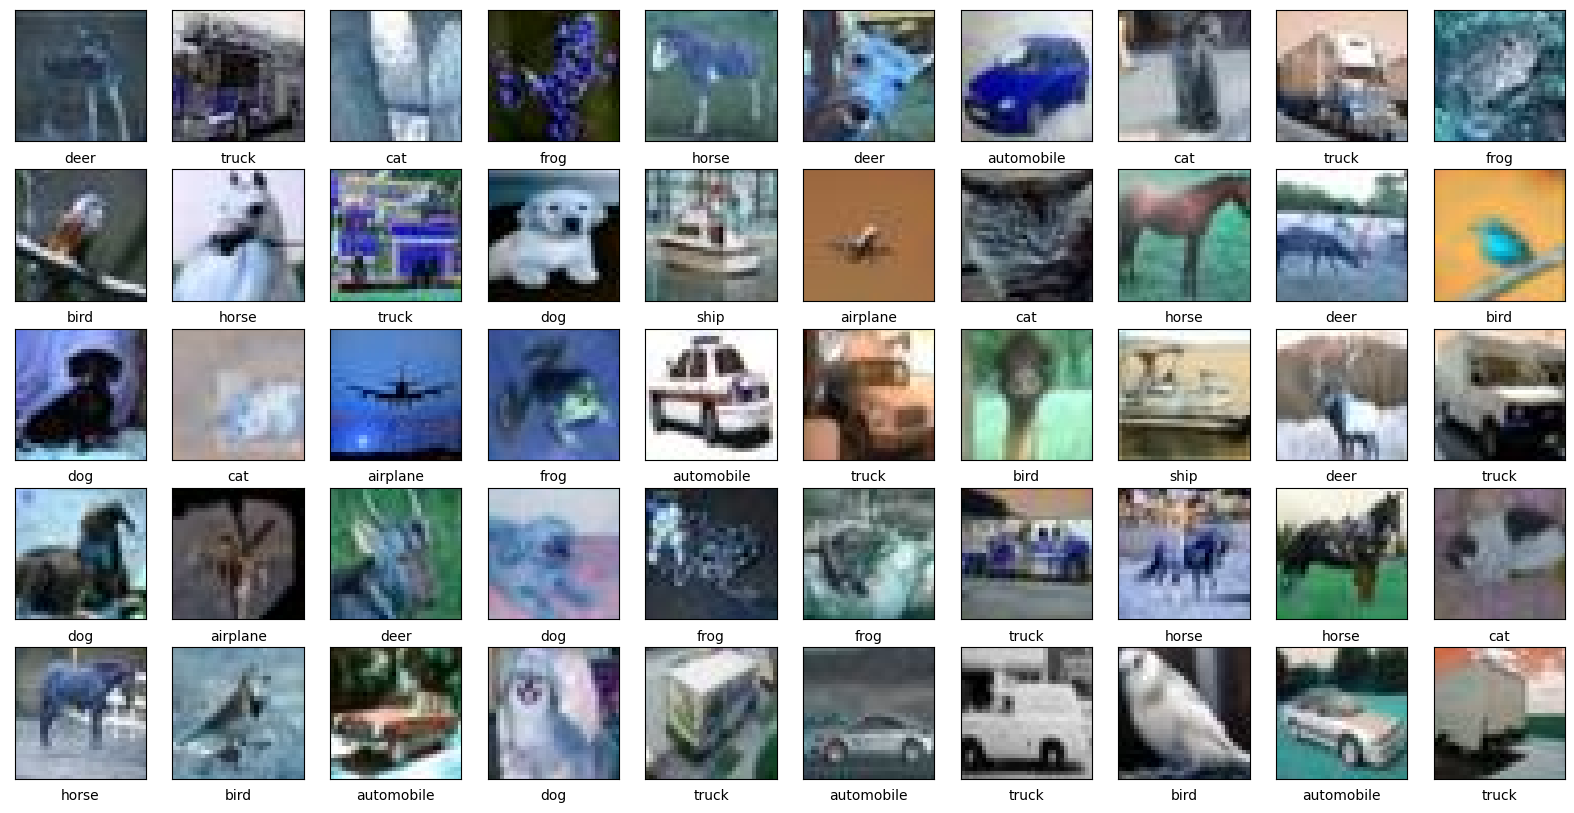

In [4]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [5]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [6]:
import numpy as np
import matplotlib.pyplot as plt

k_max = 20

def l1_dist(x, y):
    return np.sum(np.abs(x - y))

def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))



mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

for k in tqdm(range(1, k_max+1,2)):
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    
    for i in range(5):
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4

        acc_l1 = 0
        acc_l2 = 0

        for v in tqdm(validation):
            l1_dists = []
            l2_dists = []
            for t in train:
                l1 = l1_dist(v[0], t[0])
                l2 = l2_dist(v[0], t[0])
                l1_dists.append((l1, t[1]))
                l2_dists.append((l2, t[1]))
            l1_dists.sort(key=lambda x: x[0])
            l2_dists.sort(key=lambda x: x[0])

            neighbors_l1 = [d[1] for d in l1_dists[:k]]
            counts_l1 = np.bincount(neighbors_l1)
            pred_l1 = np.argmax(counts_l1)

            neighbors_l2 = [d[1] for d in l2_dists[:k]]
            counts_l2 = np.bincount(neighbors_l2)
            pred_l2 = np.argmax(counts_l2)

            if pred_l1 == v[1]:
                acc_l1 += 1
            if pred_l2 == v[1]:
                acc_l2 += 1

        fold_accuracies_l1.append(acc_l1 / len(validation))
        fold_accuracies_l2.append(acc_l2 / len(validation))

    mean_accuracies_l1.append(np.mean(fold_accuracies_l1))
    std_accuracies_l1.append(np.std(fold_accuracies_l1))
    mean_accuracies_l2.append(np.mean(fold_accuracies_l2))
    std_accuracies_l2.append(np.std(fold_accuracies_l2))


100%|██████████| 10/10 [3:26:27<00:00, 1238.70s/it]


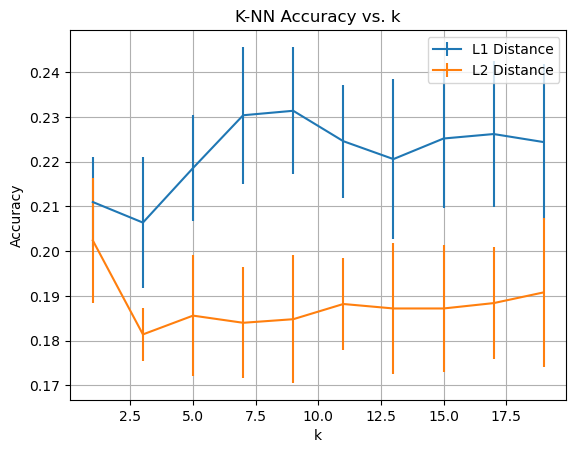

In [11]:
import matplotlib.pyplot as plt

# Define colors for the lines
color_l1 = 'tab:blue'
color_l2 = 'tab:orange'

# Plot the data with error bars and colors
plt.errorbar(range(1, k_max+1,2), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance", color=color_l1)
plt.errorbar(range(1, k_max+1,2), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance", color=color_l2)

# Add axis labels and a title
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy vs. k")

# Add a legend and a grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
After experimenting with the CIFAR-10 dataset using L1 and L2 regularization techniques,
it can be observed that L1 regularization performs better in terms of accuracy than L2 regularization.
L1 regularization is found to be more effective in selecting important features and eliminating redundant ones,
which leads to better generalization performance and hence, improved accuracy. 